In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import glob
import os
import sklearn.metrics
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
adata=sc.read("../../important_processed_data/8.27_mergeall_log1p_gene_filtered.h5ad")

In [180]:
adata

AnnData object with n_obs × n_vars = 781397 × 50265
    obs: 'Sample', 'Project', 'Core Dataset', 'Limb Atlas', 'Cranial Atlas', 'Organ', 'Tissue', 'Tissue(Specific)', 'Stage', 'Gene type', 'Treatment', 'Age', 'Age(In Detail)', 'Machine', 'Species', 'Isolation approach', 'Digestion', 'Enzymes', 'Cre', 'Bone Forming Methods', 'Data Source', 'Related Assay', 'Cell Count After QC', 'Origin', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'scDblFinder_class', 'short_id', 'nCount_originalexp', 'nFeature_originalexp', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'new_totals_log'
    var: 'features', 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'h

In [74]:
unc_threshold=0.2

In [172]:

sc.settings.figdir="../result/9.10_extend_atlas/"

In [10]:
full_latent=sc.read("../../important_processed_data/9.13_full_latent.h5ad")

In [87]:
metadata=pd.read_excel("../data/8.18_sampleMeta.xlsx")
metadata=pd.merge(full_latent.obs["Sample"],metadata,on="Sample")


In [101]:
metadata["Age"].unique()

array(['Fetal stage', 'Organogenesis stage', 'Postnatal', 'Young Adult',
       'Adult', 'Old'], dtype=object)

In [146]:
full_latent.obs["Organ"]=metadata["Organ"].values
full_latent.obs["Tissue"]=metadata["Tissue"].values

In [205]:
full_latent.obs["Age"]=metadata["Age"].values
full_latent.obs["Tissue.Specific."]=metadata['Tissue(Specific)'].values
full_latent.obs["Origin"]=metadata["Origin"].values
full_latent.obs["Age.In.Detail."]=metadata['Age(In Detail)'].values
full_latent.obs["Bone.Forming.Methods"]=metadata['Bone Forming Methods'].values

In [206]:
full_latent.obs.columns

Index(['orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample',
       'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage',
       'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species',
       'Isolation.approach', 'Digestion', 'Enzymes', 'Cre',
       'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin',
       'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'C2_named',
       'C7_named', 'C19_named', 'C36_named', 'C49_named', 'C90_named',
       'C137_named', 'transf_ann_level_7_label', 'transf_ann_level_6_label',
       'transf_ann_level_5_label', 'transf_ann_level_4_label',
       'transf_ann_level_3_label', 'transf_ann_level_2_label',
       'transf_ann_level_1_label', 'n_genes', 'most_confident_level',
       'most_confident_uncert', 'most_confident_label',
       'transf_ann_level_5_uncert', 'transf_ann_level_4_uncert',
       'transf_ann_level_3_uncert', 'transf_ann_level_2_uncert',
       'transf_ann_l

In [207]:
queryDf=full_latent.obs[full_latent.obs["Core_or_Extand"]=="Extand"]

In [208]:
queryDf["Sample"]=queryDf["Sample"].astype("str")

/tmp/ipykernel_1805584/2622983848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  queryDf["Sample"]=queryDf["Sample"].astype("str")


In [149]:
sample_age_uncert_info = queryDf.groupby("Sample").agg(
    {
        "Age": "first",
        "transf_ann_level_3_uncert": "mean",
        "Tissue": "first",
        "Treatment": "first",
        "Project":"first",
        "Stage":"first",
        "Organ":"first"
    }
)

In [150]:
sample_age_uncert_info

,Age,transf_ann_level_3_uncert,Tissue,Treatment,Project,Stage,Organ
Sample,,,,,,,
Articular_Arce_CtrlI,Young Adult,0.380084,Synovial Joint,None,Articular_Arce,Injury(Regeneration),Limb_adult
Articular_Arce_CtrlU,Young Adult,0.188748,Synovial Joint,None,Articular_Arce,Injury(Regeneration),Limb_adult
Articular_Arce_T1MDI,Young Adult,0.263892,Synovial Joint,None,Articular_Arce,Injury(Regeneration),Limb_adult
Articular_Arce_T1MDU,Young Adult,0.125092,Synovial Joint,None,Articular_Arce,Injury(Regeneration),Limb_adult
Articular_Sebastian_3DPI,Young Adult,0.469861,Synovial Joint,tibial compressive overload model,Articular_Sebastian,Injury(Regeneration),Limb_adult
...,...,...,...,...,...,...,...
SkeletalMuscle_Julien_d3,Adult,0.427330,Muscle,None,SkeletalMuscle_Julien,Injury(Regeneration),Limb_adult
SkeletalMuscle_Julien_d3Poly,Adult,0.402621,Muscle,None,SkeletalMuscle_Julien,Injury(Regeneration),Limb_adult
SkeletalMuscle_Julien_d5,Adult,0.399081,Muscle,None,SkeletalMuscle_Julien,Injury(Regeneration),Limb_adult


In [106]:
FIGURES = dict()


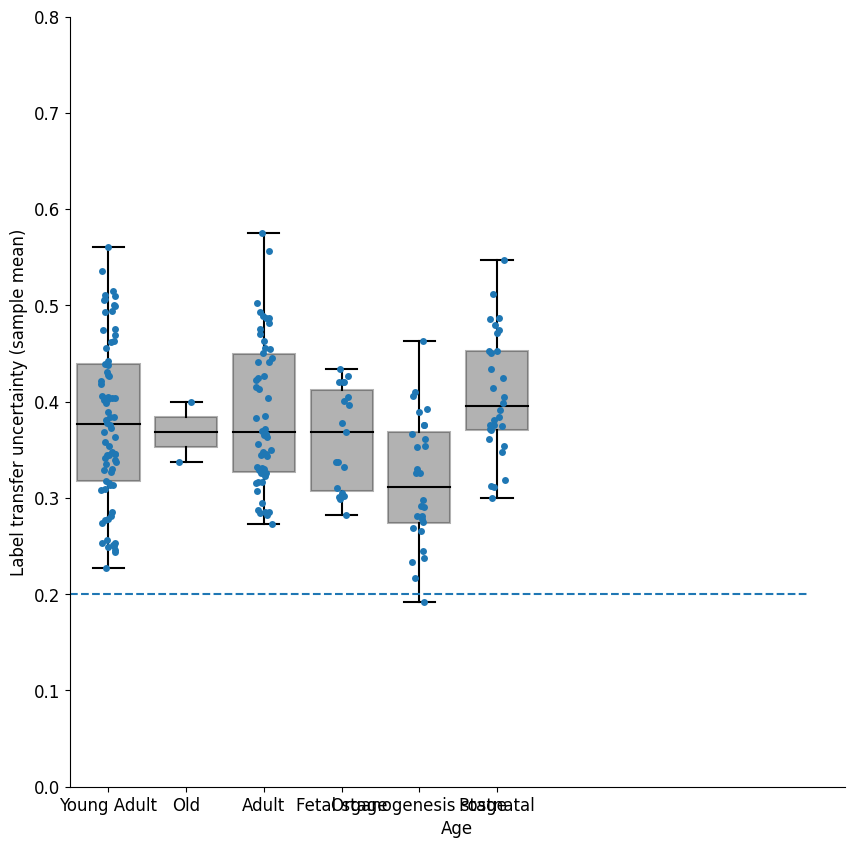

In [107]:
fz = 12
with plt.rc_context(
    {
        "figure.figsize": (10, 10),
        "xtick.labelsize": fz,
        "ytick.labelsize": fz,
        "axes.labelsize": fz,
        "font.size": fz,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
):
    fig, ax = plt.subplots()
    sns.stripplot(
        data=sample_age_uncert_info,
        x="Age",
        y="transf_ann_level_5_uncert",
        ax=ax,
    )
    sns.boxplot(
        data=sample_age_uncert_info,
        x="Age",
        y="transf_ann_level_5_uncert",
        color="black",
        fliersize=0,
        ax=ax,
        boxprops=dict(alpha=0.3),
    )

    ax.set_ylim((0, 0.8))
    ax.hlines(xmin=-0.5, xmax=9, y=unc_threshold, linestyles="--")
    ax.set_xlabel("Age")
    ax.set_ylabel("Label transfer uncertainty (sample mean)")

    # plt.tight_layout()
    plt.show()
    plt.close()
    # store
    FIGURES["6c_label_tr_uncert_by_age"] = fig

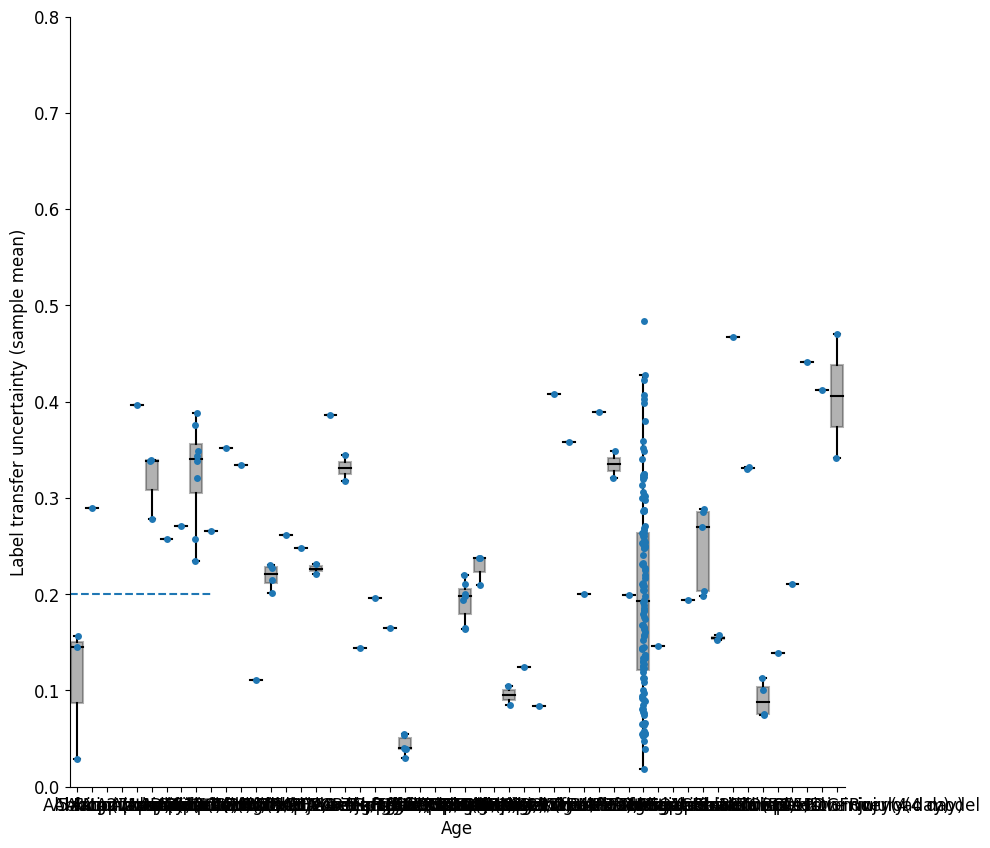

In [139]:
fz = 12
with plt.rc_context(
    {
        "figure.figsize": (10, 10),
        "xtick.labelsize": fz,
        "ytick.labelsize": fz,
        "axes.labelsize": fz,
        "font.size": fz,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
):
    fig, ax = plt.subplots()
    sns.stripplot(
        data=sample_age_uncert_info,
        x="Treatment",
        y="transf_ann_level_3_uncert",
        ax=ax,
    )
    sns.boxplot(
        data=sample_age_uncert_info,
        x="Treatment",
        y="transf_ann_level_3_uncert",
        color="black",
        fliersize=0,
        ax=ax,
        boxprops=dict(alpha=0.3),
    )

    ax.set_ylim((0, 0.8))
    ax.hlines(xmin=-0.5, xmax=9, y=unc_threshold, linestyles="--")
    ax.set_xlabel("Age")
    ax.set_ylabel("Label transfer uncertainty (sample mean)")

    # plt.tight_layout()
    plt.show()
    plt.close()
    # store
    FIGURES["6c_label_tr_uncert_by_age"] = fig

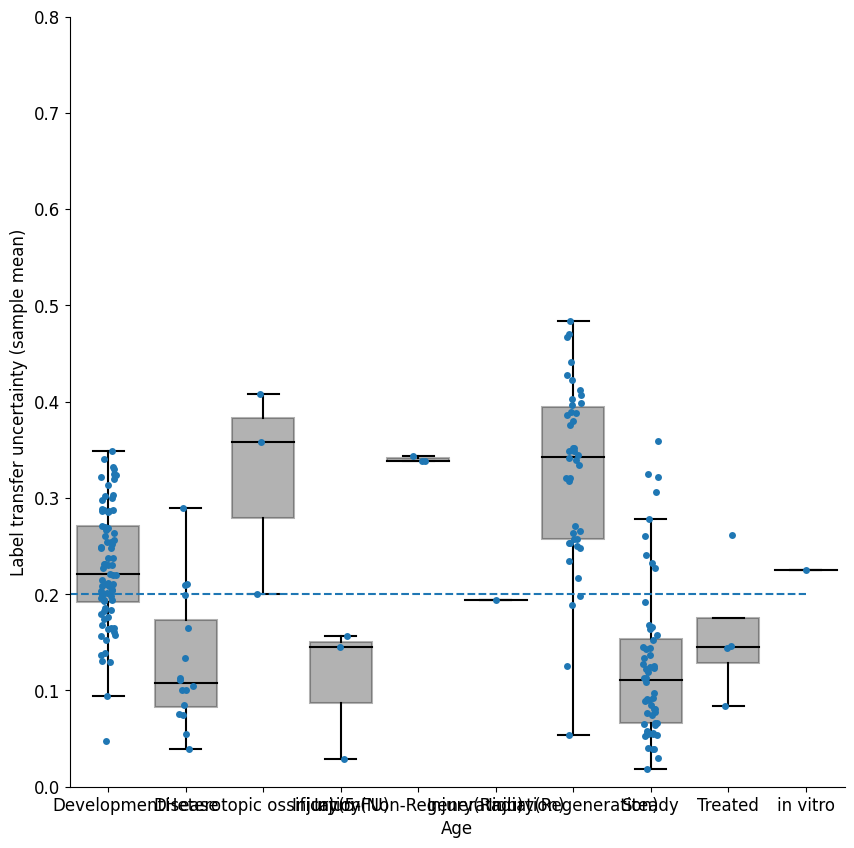

In [143]:
fz = 12
with plt.rc_context(
    {
        "figure.figsize": (10, 10),
        "xtick.labelsize": fz,
        "ytick.labelsize": fz,
        "axes.labelsize": fz,
        "font.size": fz,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
):
    fig, ax = plt.subplots()
    sns.stripplot(
        data=sample_age_uncert_info,
        x="Stage",
        y="transf_ann_level_3_uncert",
        ax=ax,
    )
    sns.boxplot(
        data=sample_age_uncert_info,
        x="Stage",
        y="transf_ann_level_3_uncert",
        color="black",
        fliersize=0,
        ax=ax,
        boxprops=dict(alpha=0.3),
    )

    ax.set_ylim((0, 0.8))
    ax.hlines(xmin=-0.5, xmax=9, y=unc_threshold, linestyles="--")
    ax.set_xlabel("Age")
    ax.set_ylabel("Label transfer uncertainty (sample mean)")

    # plt.tight_layout()
    plt.show()
    plt.close()
    # store
    FIGURES["6c_label_tr_uncert_by_age"] = fig

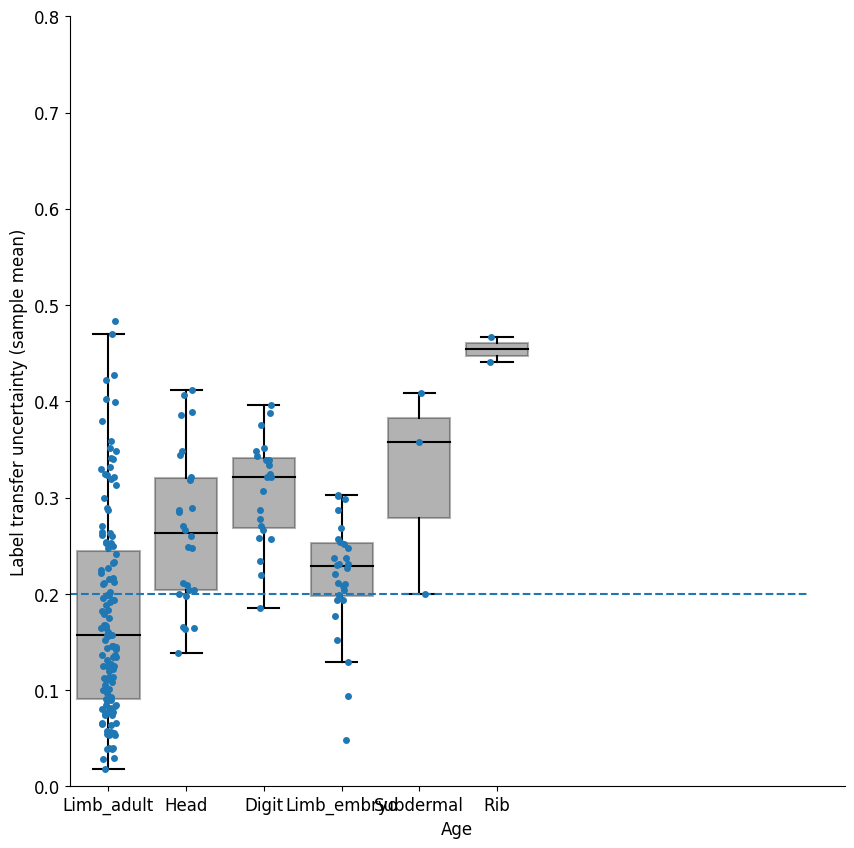

In [151]:
fz = 12
with plt.rc_context(
    {
        "figure.figsize": (10, 10),
        "xtick.labelsize": fz,
        "ytick.labelsize": fz,
        "axes.labelsize": fz,
        "font.size": fz,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
):
    fig, ax = plt.subplots()
    sns.stripplot(
        data=sample_age_uncert_info,
        x="Organ",
        y="transf_ann_level_3_uncert",
        ax=ax,
    )
    sns.boxplot(
        data=sample_age_uncert_info,
        x="Organ",
        y="transf_ann_level_3_uncert",
        color="black",
        fliersize=0,
        ax=ax,
        boxprops=dict(alpha=0.3),
    )

    ax.set_ylim((0, 0.8))
    ax.hlines(xmin=-0.5, xmax=9, y=unc_threshold, linestyles="--")
    ax.set_xlabel("Age")
    ax.set_ylabel("Label transfer uncertainty (sample mean)")

    # plt.tight_layout()
    plt.show()
    plt.close()
    # store
    FIGURES["6c_label_tr_uncert_by_age"] = fig

In [ ]:
full_latent

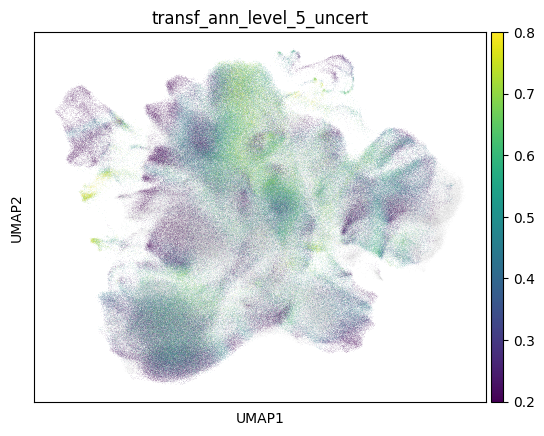

In [111]:
sc.pl.umap(full_latent,color="transf_ann_level_5_uncert",vmax=0.8,vmin=0.2)

In [116]:
query=full_latent[queryDf.index,]

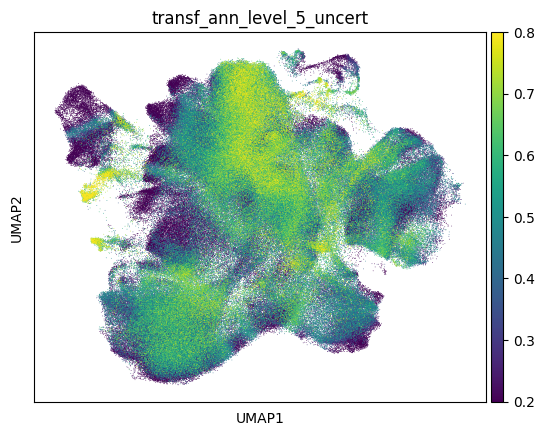

In [120]:
sc.pl.umap(query,color="transf_ann_level_5_uncert",vmax=0.8,vmin=0.2,size=1.2)

In [128]:
resultsDf=pd.read_csv("../../important_processed_data/9.13_transfered_labels_query_only.csv")

In [131]:
resultsDf=resultsDf.set_index("Unnamed: 0")

In [132]:
query.obs["transf_ann_level_7_uncert"]=resultsDf["transf_ann_level_7_uncert"]
query.obs["transf_ann_level_6_uncert"]=resultsDf["transf_ann_level_6_uncert"]

/tmp/ipykernel_1805584/2770363542.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  query.obs["transf_ann_level_7_uncert"]=resultsDf["transf_ann_level_7_uncert"]


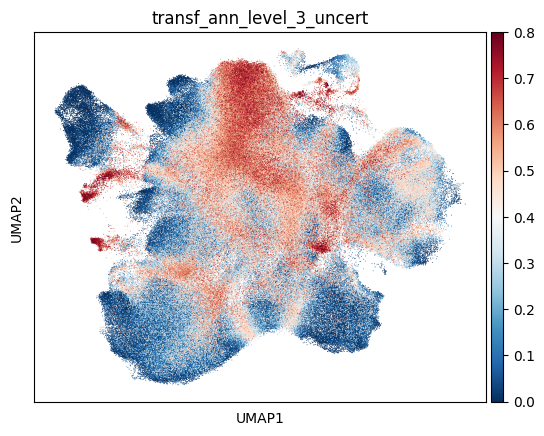

In [345]:
sc.pl.umap(query,color="transf_ann_level_3_uncert",vmax=0.8,size=1.5,save="transf_level3",color_map="RdBu_r")

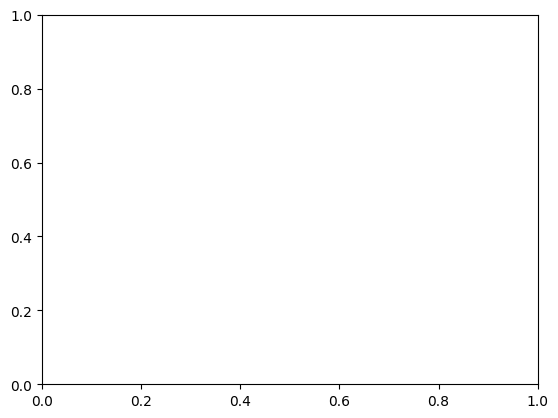

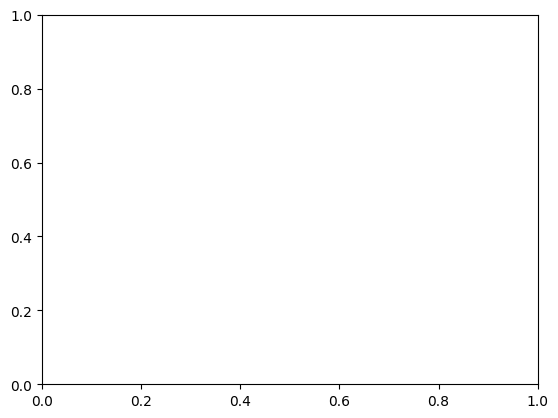

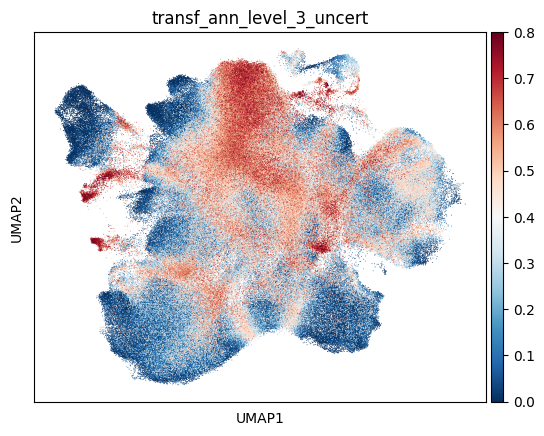

In [1284]:
sc.pl.umap(query,color="transf_ann_level_3_uncert",vmax=0.8,size=1.5,color_map="RdBu_r",use_raw=False)

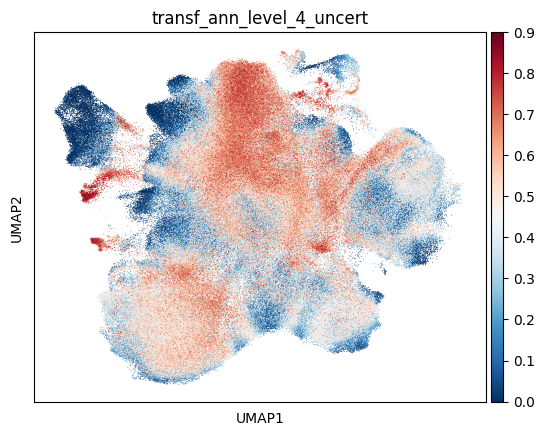

In [346]:
sc.pl.umap(query,color="transf_ann_level_4_uncert",vmax=0.9,size=1.5,save="transf_level4",color_map="RdBu_r")

In [171]:
sample_age_uncert_info["Project"][sample_age_uncert_info['transf_ann_level_3_uncert']>0.35]

Sample
Articular_Arce_CtrlI                        Articular_Arce
Articular_Sebastian_3DPI               Articular_Sebastian
BmscEpi_Kanazawa                          BmscEpi_Kanazawa
CranioRepairP75_Xu_KO                   CranioRepairP75_Xu
CranioRepairP75_Xu_WT                   CranioRepairP75_Xu
Digit2019_Storer_Gen28DPA                 Digit2019_Storer
Digit2019_Storer_Gen7DPA                  Digit2019_Storer
DigitLmx1b_Miller_Lmx1b                  DigitLmx1b_Miller
DigitLmx1b_Miller_Pdgfra                 DigitLmx1b_Miller
HeterotopicActin_Mundy_bmp2         HeterotopicActin_Mundy
HeterotopicActin_Mundy_bmpab        HeterotopicActin_Mundy
LimbImplant_VesPrey_Acta2              LimbImplant_VesPrey
LimbImplant_VesPrey_Tmem100            LimbImplant_VesPrey
MsxCranio_Zhang_W1Con1                     MsxCranio_Zhang
MsxCranio_Zhang_W1N1                       MsxCranio_Zhang
RibRegeneraton_Serowoky_Control    RibRegeneraton_Serowoky
RibRegeneraton_Serowoky_KO         RibRegeneraton

In [168]:
[sample_age_uncert_info['transf_ann_level_3_uncert']>0.5]

[Sample
 Articular_Arce_CtrlI            False
 Articular_Arce_CtrlU            False
 Articular_Arce_T1MDI            False
 Articular_Arce_T1MDU            False
 Articular_Sebastian_3DPI        False
                                 ...  
 SkeletalMuscle_Julien_d3        False
 SkeletalMuscle_Julien_d3Poly    False
 SkeletalMuscle_Julien_d5        False
 SkeletalMuscle_Julien_d5Poly    False
 Sp7Cre2019_Bohm                 False
 Name: transf_ann_level_3_uncert, Length: 209, dtype: bool]

## We subset chondrocell to see which datasets contribute most

In [209]:
ChondroDf=queryDf[queryDf['transf_ann_level_2_label']=="Chondro"]

In [210]:
ChondroDf.columns

Index(['orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample',
       'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage',
       'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species',
       'Isolation.approach', 'Digestion', 'Enzymes', 'Cre',
       'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin',
       'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'C2_named',
       'C7_named', 'C19_named', 'C36_named', 'C49_named', 'C90_named',
       'C137_named', 'transf_ann_level_7_label', 'transf_ann_level_6_label',
       'transf_ann_level_5_label', 'transf_ann_level_4_label',
       'transf_ann_level_3_label', 'transf_ann_level_2_label',
       'transf_ann_level_1_label', 'n_genes', 'most_confident_level',
       'most_confident_uncert', 'most_confident_label',
       'transf_ann_level_5_uncert', 'transf_ann_level_4_uncert',
       'transf_ann_level_3_uncert', 'transf_ann_level_2_uncert',
       'transf_ann_l

In [211]:
chondro_uncert_info = ChondroDf.groupby("Sample").agg(
    {
        "Age": "first",
        "transf_ann_level_3_uncert": "mean",
        "transf_ann_level_2_uncert": "mean",
        "transf_ann_level_4_uncert": "mean",
        "Tissue": "first",
        "Tissue.Specific.":"first",
        "Origin":"first",
        "Tissue.Specific":"first",
        "Age.In.Detail.":"first",
        "Treatment": "first",
        "Project":"first",
        "Stage":"first",
        "Organ":"first"
    }
)

In [212]:
chondro_uncert_info

,Age,transf_ann_level_3_uncert,transf_ann_level_2_uncert,transf_ann_level_4_uncert,Tissue,Tissue.Specific.,Origin,Tissue.Specific,Age.In.Detail.,Treatment,Project,Stage,Organ
Sample,,,,,,,,,,,,,
Articular_Arce_CtrlI,Young Adult,0.377726,0.227483,0.474984,Synovial Joint,Knee Synovial Joint,Mesoderm,Knee Synovial Joint,10W,None,Articular_Arce,Injury(Regeneration),Limb_adult
Articular_Arce_CtrlU,Young Adult,0.338983,0.040626,0.369874,Synovial Joint,Knee Synovial Joint,Mesoderm,Knee Synovial Joint,10W,None,Articular_Arce,Injury(Regeneration),Limb_adult
Articular_Arce_T1MDI,Young Adult,0.300310,0.198174,0.382234,Synovial Joint,Knee Synovial Joint,Mesoderm,Knee Synovial Joint,10W,None,Articular_Arce,Injury(Regeneration),Limb_adult
Articular_Arce_T1MDU,Young Adult,0.151634,0.077765,0.191631,Synovial Joint,Knee Synovial Joint,Mesoderm,Knee Synovial Joint,10W,None,Articular_Arce,Injury(Regeneration),Limb_adult
Articular_Sebastian_3DPI,Young Adult,0.331839,0.161355,0.405042,Synovial Joint,Synovial Joint,Mesoderm,Synovial Joint,10W,tibial compressive overload model,Articular_Sebastian,Injury(Regeneration),Limb_adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
SkeletalMuscle_Julien_d3,Adult,0.599986,0.599986,0.780001,Muscle,Skeletal Muscle,Mesoderm,Skeletal Muscle,10-14W,None,SkeletalMuscle_Julien,Injury(Regeneration),Limb_adult
SkeletalMuscle_Julien_d3Poly,Adult,0.410535,0.236696,0.415150,Muscle,Skeletal Muscle,Mesoderm,Skeletal Muscle,10-14W,None,SkeletalMuscle_Julien,Injury(Regeneration),Limb_adult
SkeletalMuscle_Julien_d5,Adult,0.485452,0.469090,0.530909,Muscle,Skeletal Muscle,Mesoderm,Skeletal Muscle,10-14W,None,SkeletalMuscle_Julien,Injury(Regeneration),Limb_adult


In [213]:
chondro_uncert_info.sort_values("transf_ann_level_3_uncert",ascending=False)

,Age,transf_ann_level_3_uncert,transf_ann_level_2_uncert,transf_ann_level_4_uncert,Tissue,Tissue.Specific.,Origin,Tissue.Specific,Age.In.Detail.,Treatment,Project,Stage,Organ
Sample,,,,,,,,,,,,,
BMSC-Stress_Mo_Aging,Old,0.719669,0.660030,0.719669,Femur,Metaphysis and Diaphysis,Mesoderm,Metaphysis and Diaphysis,12M,None,BMSC-Stress_Mo,Disease,Limb_adult
MsxCranio_Zhang_W2Con2,Young Adult,0.659970,0.659970,0.740041,Calvarial bone,Calvarial bone,Mixture,Calvarial bone,10W,N group at 2 week after implantation,MsxCranio_Zhang,Injury(Regeneration),Head
RibRegeneraton_Serowoky_KO,Young Adult,0.659948,0.553397,0.666615,Rib bone,Repair Callus of Rib Bones,Mesoderm,Repair Callus of Rib Bones,8-12W,Smo(flox/flox);large-scale rib resection injur...,RibRegeneraton_Serowoky,Injury(Regeneration),Rib
HeterotopicActin_Mundy_bmpab,Young Adult,0.653331,0.479990,0.679997,Subdermal,Subdermal ectopic mass cells,Mesoderm,Subdermal ectopic mass cells,2M,Matrigel/rhBMP2+IgG,HeterotopicActin_Mundy,Heterotopic ossification,Subdermal
SkeletalMuscle_Julien_d3,Adult,0.599986,0.599986,0.780001,Muscle,Skeletal Muscle,Mesoderm,Skeletal Muscle,10-14W,None,SkeletalMuscle_Julien,Injury(Regeneration),Limb_adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
BmscFac2019_Anastasia_CNTRL,Adult,0.104666,0.082538,0.122539,Femurs;Tibias;Ileums,Diaphysis and Epiphysis,Mesoderm,Diaphysis and Epiphysis,Adult,Sham,BmscFac2019_Anastasia,Steady,Limb_adult
CalvariaHuman_He_2,Organogenesis stage,0.064648,0.008371,0.070229,Calvarial bone,Calvarial bone,Mixture,Calvarial bone,8 WPC,None,CalvariaHuman_He,Development,Head
CalvariaHuman_He_1,Organogenesis stage,0.051887,0.003784,0.052157,Calvarial bone,Calvarial bone,Mixture,Calvarial bone,8 WPC,None,CalvariaHuman_He,Development,Head


In [214]:
chondro_uncert_info.sort_values("transf_ann_level_3_uncert",ascending=False).head()

,Age,transf_ann_level_3_uncert,transf_ann_level_2_uncert,transf_ann_level_4_uncert,Tissue,Tissue.Specific.,Origin,Tissue.Specific,Age.In.Detail.,Treatment,Project,Stage,Organ
Sample,,,,,,,,,,,,,
BMSC-Stress_Mo_Aging,Old,0.719669,0.660030,0.719669,Femur,Metaphysis and Diaphysis,Mesoderm,Metaphysis and Diaphysis,12M,None,BMSC-Stress_Mo,Disease,Limb_adult
MsxCranio_Zhang_W2Con2,Young Adult,0.659970,0.659970,0.740041,Calvarial bone,Calvarial bone,Mixture,Calvarial bone,10W,N group at 2 week after implantation,MsxCranio_Zhang,Injury(Regeneration),Head
RibRegeneraton_Serowoky_KO,Young Adult,0.659948,0.553397,0.666615,Rib bone,Repair Callus of Rib Bones,Mesoderm,Repair Callus of Rib Bones,8-12W,Smo(flox/flox);large-scale rib resection injur...,RibRegeneraton_Serowoky,Injury(Regeneration),Rib
HeterotopicActin_Mundy_bmpab,Young Adult,0.653331,0.479990,0.679997,Subdermal,Subdermal ectopic mass cells,Mesoderm,Subdermal ectopic mass cells,2M,Matrigel/rhBMP2+IgG,HeterotopicActin_Mundy,Heterotopic ossification,Subdermal
SkeletalMuscle_Julien_d3,Adult,0.599986,0.599986,0.780001,Muscle,Skeletal Muscle,Mesoderm,Skeletal Muscle,10-14W,None,SkeletalMuscle_Julien,Injury(Regeneration),Limb_adult


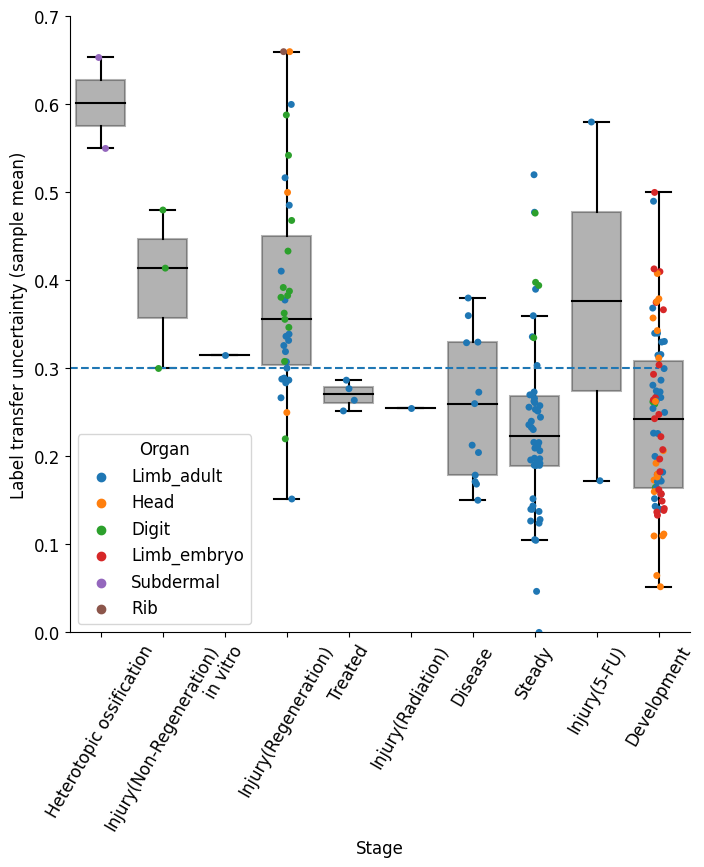

In [266]:
fz = 12
chondroDfOrder=chondro_uncert_info.groupby("Stage").agg({
    "transf_ann_level_3_uncert":"mean"}).sort_values("transf_ann_level_3_uncert",ascending=False).index
with plt.rc_context(
    {
        "figure.figsize": (8, 8),
        "xtick.labelsize": fz,
        "ytick.labelsize": fz,
        "axes.labelsize": fz,
        "font.size": fz,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
):
    fig, ax = plt.subplots()
    sns.stripplot(
        data=chondro_uncert_info,
        x="Stage",
        y="transf_ann_level_3_uncert",
        ax=ax,
        hue=chondro_uncert_info.Organ,
        order = chondroOrder
    )
    sns.boxplot(
        data=chondro_uncert_info,
        x="Stage",
        y="transf_ann_level_3_uncert",
        color="black",
        fliersize=0,
        ax=ax,
        boxprops=dict(alpha=0.3),
        order = chondroOrder
    )

    ax.set_ylim((0, 0.7))
    ax.hlines(xmin=-0.5, xmax=9, y=0.3, linestyles="--")
    ax.set_xlabel("Stage")
    ax.set_ylabel("Label transfer uncertainty (sample mean)")
    plt.xticks(rotation=60)
    # plt.tight_layout()
    plt.show()
    plt.close()
    # store
    FIGURES["chondro_by_stage"] = fig

In [262]:
chondroOrder

CategoricalIndex(['Heterotopic ossification', 'Injury(Non-Regeneration)',
                  'in vitro', 'Injury(Regeneration)', 'Treated',
                  'Injury(Radiation)', 'Disease', 'Steady', 'Injury(5-FU)',
                  'Development'],
                 categories=['Development', 'Disease', 'Heterotopic ossification', 'Injury(5-FU)', ..., 'Injury(Regeneration)', 'Steady', 'Treated', 'in vitro'], ordered=False, dtype='category', name='Stage')

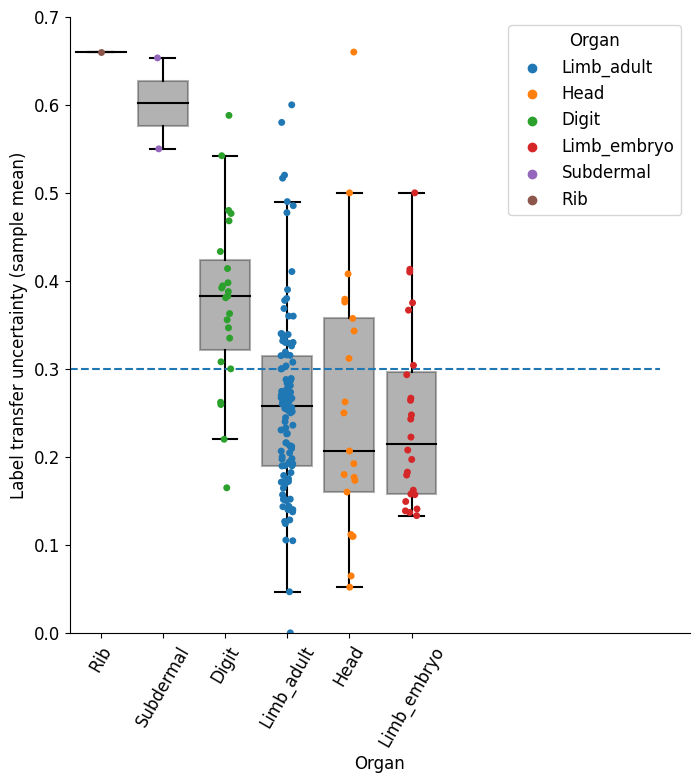

In [267]:
fz = 12
chondroDfOrder=chondro_uncert_info.groupby("Organ").agg({
    "transf_ann_level_3_uncert":"mean"}).sort_values("transf_ann_level_3_uncert",ascending=False).index
with plt.rc_context(
    {
        "figure.figsize": (8, 8),
        "xtick.labelsize": fz,
        "ytick.labelsize": fz,
        "axes.labelsize": fz,
        "font.size": fz,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
):
    fig, ax = plt.subplots()
    sns.stripplot(
        data=chondro_uncert_info,
        x="Organ",
        y="transf_ann_level_3_uncert",
        ax=ax,
        order = chondroDfOrder,
        hue=chondro_uncert_info.Organ,
        
    )
    sns.boxplot(
        data=chondro_uncert_info,
        x="Organ",
        y="transf_ann_level_3_uncert",
        color="black",
        fliersize=0,
        ax=ax,
        order=chondroDfOrder,
        boxprops=dict(alpha=0.3)
    )

    ax.set_ylim((0, 0.7))
    ax.hlines(xmin=-0.5, xmax=9, y=0.3, linestyles="--")
    ax.set_xlabel("Organ")
    ax.set_ylabel("Label transfer uncertainty (sample mean)")
    plt.xticks(rotation=60)
    # plt.tight_layout()
    plt.show()
    plt.close()
    # store
    FIGURES["Chondro_by_Organ"] = fig

In [ ]:
chondro_uncert_info = ChondroDf.groupby("transf_level4").agg(
    {
        "Age": "first",
        "transf_ann_level_3_uncert": "mean",
        "transf_ann_level_2_uncert": "mean",
        "transf_ann_level_4_uncert": "mean",
        "Tissue": "first",
        "Tissue.Specific.":"first",
        "Origin":"first",
        "Tissue.Specific":"first",
        "Age.In.Detail.":"first",
        "Treatment": "first",
        "Project":"first",
        "Stage":"first",
        "Organ":"first"
    }
)

In [269]:
ChondroDf

,orig.ident,nCount_originalexp,nFeature_originalexp,Sample,Project,Limb.Atlas,Organ,Tissue,Tissue.Specific.,Stage,...,most_confident_level,most_confident_uncert,most_confident_label,transf_ann_level_5_uncert,transf_ann_level_4_uncert,transf_ann_level_3_uncert,transf_ann_level_2_uncert,transf_ann_level_1_uncert,Tissue.Specific,Core_or_Extand
AACAAAGCACGCTATA-1_1_2_1,Articular_Arce_CtrlI,0.0,0,Articular_Arce_CtrlI,Articular_Arce,False,Limb_adult,Synovial Joint,Knee Synovial Joint,Injury(Regeneration),...,C7_named,1.199914e-01,Chondro,0.579986,0.579986,0.359975,1.199914e-01,0.000000e+00,Knee Synovial Joint,Extand
AACAAAGCATATACCG-1_1_2_1,Articular_Arce_CtrlI,0.0,0,Articular_Arce_CtrlI,Articular_Arce,False,Limb_adult,Synovial Joint,Knee Synovial Joint,Injury(Regeneration),...,C7_named,3.599739e-01,Chondro,0.679912,0.639920,0.519941,3.599739e-01,0.000000e+00,Knee Synovial Joint,Extand
AAGACAACAGGGATAC-1_1_2_1,Articular_Arce_CtrlI,0.0,0,Articular_Arce_CtrlI,Articular_Arce,False,Limb_adult,Synovial Joint,Knee Synovial Joint,Injury(Regeneration),...,C7_named,3.599475e-01,Chondro,0.699882,0.699882,0.519902,3.599475e-01,1.999265e-02,Knee Synovial Joint,Extand
AATGGAATCGTTCTAT-1_1_2_1,Articular_Arce_CtrlI,0.0,0,Articular_Arce_CtrlI,Articular_Arce,False,Limb_adult,Synovial Joint,Knee Synovial Joint,Injury(Regeneration),...,C7_named,4.799734e-01,Chondro,0.719974,0.719974,0.559974,4.799734e-01,1.110223e-16,Knee Synovial Joint,Extand
ACATCCCGTCGGTGAA-1_1_2_1,Articular_Arce_CtrlI,0.0,0,Articular_Arce_CtrlI,Articular_Arce,False,Limb_adult,Synovial Joint,Knee Synovial Joint,Injury(Regeneration),...,C19_named,5.998575e-01,CPC,0.779860,0.680122,0.599858,5.998575e-01,0.000000e+00,Knee Synovial Joint,Extand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCATCAGTG_8,Septoclasts_Kishor_Fracture4,0.0,0,Septoclasts_Kishor_Fracture4,Septoclasts_Kishor,False,Limb_adult,Femur;Tibia,Bone marrow,Injury(Regeneration),...,C7_named,1.110223e-16,Chondro,0.560004,0.400010,0.299993,1.110223e-16,1.110223e-16,Bone marrow,Extand
TTTGTTGAGCGTTCCG_8,Septoclasts_Kishor_Fracture4,0.0,0,Septoclasts_Kishor_Fracture4,Septoclasts_Kishor,False,Limb_adult,Femur;Tibia,Bone marrow,Injury(Regeneration),...,C7_named,1.000009e-01,Chondro,0.540003,0.400006,0.360008,1.000009e-01,0.000000e+00,Bone marrow,Extand
TTTGTTGAGTGGAAAG_8,Septoclasts_Kishor_Fracture4,0.0,0,Septoclasts_Kishor_Fracture4,Septoclasts_Kishor,False,Limb_adult,Femur;Tibia,Bone marrow,Injury(Regeneration),...,C7_named,2.000030e-02,Chondro,0.580001,0.500002,0.360002,2.000030e-02,0.000000e+00,Bone marrow,Extand
TTTGTTGCAAATCCCA_8,Septoclasts_Kishor_Fracture4,0.0,0,Septoclasts_Kishor_Fracture4,Septoclasts_Kishor,False,Limb_adult,Femur;Tibia,Bone marrow,Injury(Regeneration),...,C7_named,0.000000e+00,Chondro,0.480002,0.480002,0.460011,0.000000e+00,0.000000e+00,Bone marrow,Extand


In [347]:
chondroDfOrder=ChondroDf.groupby("transf_ann_level_3_label").agg({
    "transf_ann_level_3_uncert":"mean"}).sort_values("transf_ann_level_3_uncert",ascending=False).index
chondroDfFilter=ChondroDf.groupby("transf_ann_level_3_label").count()["Sample"]
chondroDfFilter=chondroDfFilter.loc[chondroDfOrder]
chondroDfFilter=chondroDfFilter.index[chondroDfFilter>50]
chondroDfOrder=chondroDfFilter
ChondroDfPlot=ChondroDf[ChondroDf["transf_ann_level_3_label"].isin(chondroDfFilter)]
ChondroDfPlot["transf_ann_level_3_label"]=ChondroDfPlot["transf_ann_level_3_label"].astype(str)

/tmp/ipykernel_1805584/3658792631.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ChondroDfPlot["transf_ann_level_3_label"]=ChondroDfPlot["transf_ann_level_3_label"].astype(str)


In [349]:
chondroDfOrder=['Col1a1.Chondro',
                  'Mature Chondro', 'HC', 'Hmmr+ CPC', 'CPC']

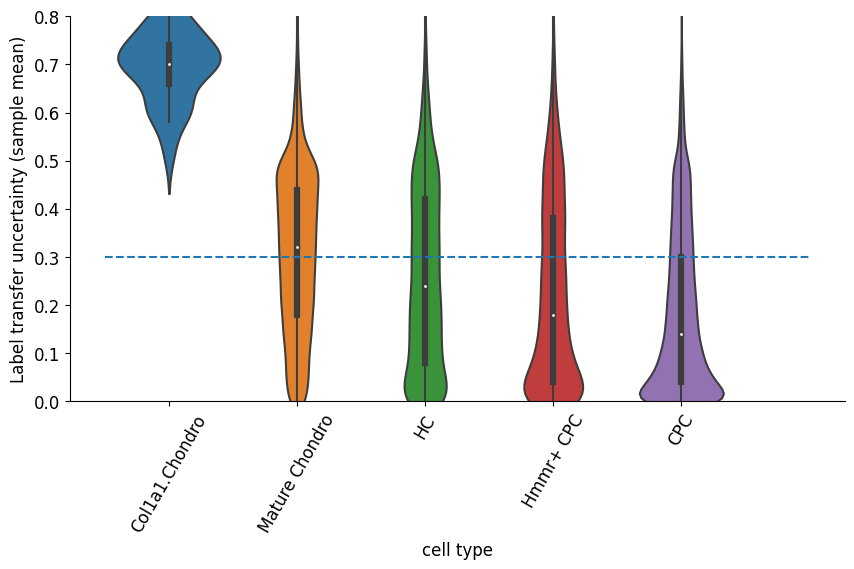

In [351]:
fz = 12

with plt.rc_context(
    {
        "figure.figsize": (10, 5),
        "xtick.labelsize": fz,
        "ytick.labelsize": fz,
        "axes.labelsize": fz,
        "font.size": fz,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
):
    fig, ax = plt.subplots()
    sns.violinplot(
        data=ChondroDfPlot,
        x="transf_ann_level_3_label",
        y="transf_ann_level_3_uncert",
        ax=ax,
        order=chondroDfOrder,
    )

    ax.set_ylim((0, 0.8))
    ax.hlines(xmin=-0.5, xmax=5, y=0.3, linestyles="--")
    ax.set_xlabel("cell type")
    ax.set_ylabel("Label transfer uncertainty (sample mean)")
    plt.xticks(rotation=60)
    # plt.tight_layout()
    plt.show()
    plt.close()
    # store
    FIGURES["Chondro_by_celltype"] = fig

In [352]:
chondroDfOrder=ChondroDf.groupby("transf_ann_level_4_label").agg({
    "transf_ann_level_3_uncert":"mean"}).sort_values("transf_ann_level_3_uncert",ascending=False).index
chondroDfFilter=ChondroDf.groupby("transf_ann_level_4_label").count()["Sample"]
chondroDfFilter=chondroDfFilter.loc[chondroDfOrder]
chondroDfFilter=chondroDfFilter.index[chondroDfFilter>50]
chondroDfOrder=chondroDfFilter

/tmp/ipykernel_1805584/3942688072.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ChondroDfPlot["transf_ann_level_4_label"]=ChondroDfPlot["transf_ann_level_4_label"].astype(str)


In [354]:
chondroDfOrder=['Col1a1.Chondro',  'Il17b.Mature Chondro', 'A2m+ Chondro',
                  'Pde11a.HC', 'Hmmr+ CPC', 'Ucma.CPC', 'Lipc.HC', 'Prg4.CPC',
                  'Ffar4+ HC', 'Ihh.Mature Chondro']

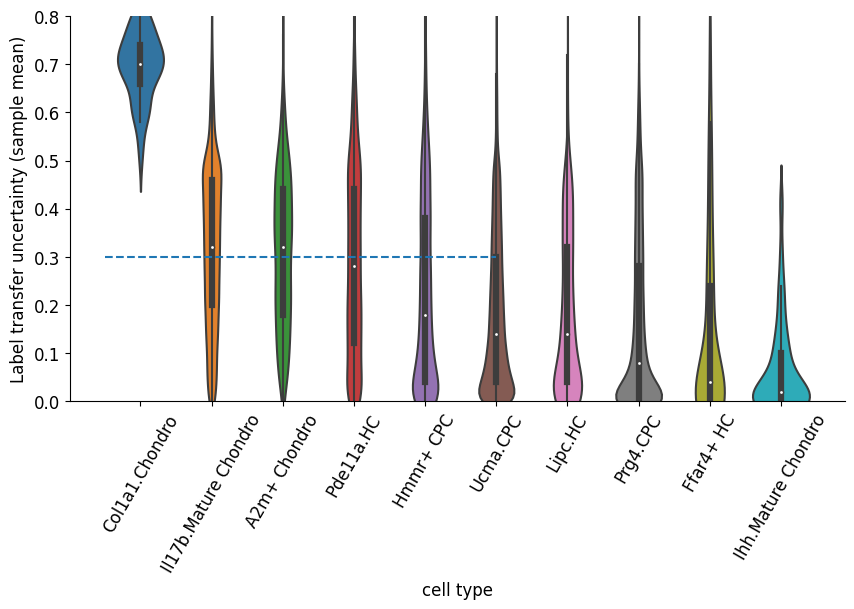

In [355]:
fz = 12

with plt.rc_context(
    {
        "figure.figsize": (10, 5),
        "xtick.labelsize": fz,
        "ytick.labelsize": fz,
        "axes.labelsize": fz,
        "font.size": fz,
        "axes.spines.right": False,
        "axes.spines.top": False,
    }
):
    fig, ax = plt.subplots()
    sns.violinplot(
        data=ChondroDf,
        x="transf_ann_level_4_label",
        y="transf_ann_level_3_uncert",
        ax=ax,
        order=chondroDfOrder,
    )

    ax.set_ylim((0, 0.8))
    ax.hlines(xmin=-0.5, xmax=5, y=0.3, linestyles="--")
    ax.set_xlabel("cell type")
    ax.set_ylabel("Label transfer uncertainty (sample mean)")
    plt.xticks(rotation=60)
    # plt.tight_layout()
    plt.show()
    plt.close()
    # store
    FIGURES["Chondro_by_celltype_level4"] = fig

In [321]:
ChondroDfPlot["transf_ann_level_3_label"].unique()

array(['CPC', 'Mature Chondro', 'Hmmr+ CPC', 'HC', 'Fibro', 'Low quality',
       'Early.MSC'], dtype=object)

In [300]:
chondroDfFilter=ChondroDf.groupby("transf_ann_level_3_label").count()["Sample"]

In [312]:
ChondroDf[ChondroDf["transf_ann_level_3_label"].isin(chondroDfFilter)]

,orig.ident,nCount_originalexp,nFeature_originalexp,Sample,Project,Limb.Atlas,Organ,Tissue,Tissue.Specific.,Stage,...,most_confident_level,most_confident_uncert,most_confident_label,transf_ann_level_5_uncert,transf_ann_level_4_uncert,transf_ann_level_3_uncert,transf_ann_level_2_uncert,transf_ann_level_1_uncert,Tissue.Specific,Core_or_Extand
AACAAAGCACGCTATA-1_1_2_1,Articular_Arce_CtrlI,0.0,0,Articular_Arce_CtrlI,Articular_Arce,False,Limb_adult,Synovial Joint,Knee Synovial Joint,Injury(Regeneration),...,C7_named,1.199914e-01,Chondro,0.579986,0.579986,0.359975,1.199914e-01,0.000000e+00,Knee Synovial Joint,Extand
AACAAAGCATATACCG-1_1_2_1,Articular_Arce_CtrlI,0.0,0,Articular_Arce_CtrlI,Articular_Arce,False,Limb_adult,Synovial Joint,Knee Synovial Joint,Injury(Regeneration),...,C7_named,3.599739e-01,Chondro,0.679912,0.639920,0.519941,3.599739e-01,0.000000e+00,Knee Synovial Joint,Extand
AAGACAACAGGGATAC-1_1_2_1,Articular_Arce_CtrlI,0.0,0,Articular_Arce_CtrlI,Articular_Arce,False,Limb_adult,Synovial Joint,Knee Synovial Joint,Injury(Regeneration),...,C7_named,3.599475e-01,Chondro,0.699882,0.699882,0.519902,3.599475e-01,1.999265e-02,Knee Synovial Joint,Extand
AATGGAATCGTTCTAT-1_1_2_1,Articular_Arce_CtrlI,0.0,0,Articular_Arce_CtrlI,Articular_Arce,False,Limb_adult,Synovial Joint,Knee Synovial Joint,Injury(Regeneration),...,C7_named,4.799734e-01,Chondro,0.719974,0.719974,0.559974,4.799734e-01,1.110223e-16,Knee Synovial Joint,Extand
ACATCCCGTCGGTGAA-1_1_2_1,Articular_Arce_CtrlI,0.0,0,Articular_Arce_CtrlI,Articular_Arce,False,Limb_adult,Synovial Joint,Knee Synovial Joint,Injury(Regeneration),...,C19_named,5.998575e-01,CPC,0.779860,0.680122,0.599858,5.998575e-01,0.000000e+00,Knee Synovial Joint,Extand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCATCAGTG_8,Septoclasts_Kishor_Fracture4,0.0,0,Septoclasts_Kishor_Fracture4,Septoclasts_Kishor,False,Limb_adult,Femur;Tibia,Bone marrow,Injury(Regeneration),...,C7_named,1.110223e-16,Chondro,0.560004,0.400010,0.299993,1.110223e-16,1.110223e-16,Bone marrow,Extand
TTTGTTGAGCGTTCCG_8,Septoclasts_Kishor_Fracture4,0.0,0,Septoclasts_Kishor_Fracture4,Septoclasts_Kishor,False,Limb_adult,Femur;Tibia,Bone marrow,Injury(Regeneration),...,C7_named,1.000009e-01,Chondro,0.540003,0.400006,0.360008,1.000009e-01,0.000000e+00,Bone marrow,Extand
TTTGTTGAGTGGAAAG_8,Septoclasts_Kishor_Fracture4,0.0,0,Septoclasts_Kishor_Fracture4,Septoclasts_Kishor,False,Limb_adult,Femur;Tibia,Bone marrow,Injury(Regeneration),...,C7_named,2.000030e-02,Chondro,0.580001,0.500002,0.360002,2.000030e-02,0.000000e+00,Bone marrow,Extand
TTTGTTGCAAATCCCA_8,Septoclasts_Kishor_Fracture4,0.0,0,Septoclasts_Kishor_Fracture4,Septoclasts_Kishor,False,Limb_adult,Femur;Tibia,Bone marrow,Injury(Regeneration),...,C7_named,0.000000e+00,Chondro,0.480002,0.480002,0.460011,0.000000e+00,0.000000e+00,Bone marrow,Extand


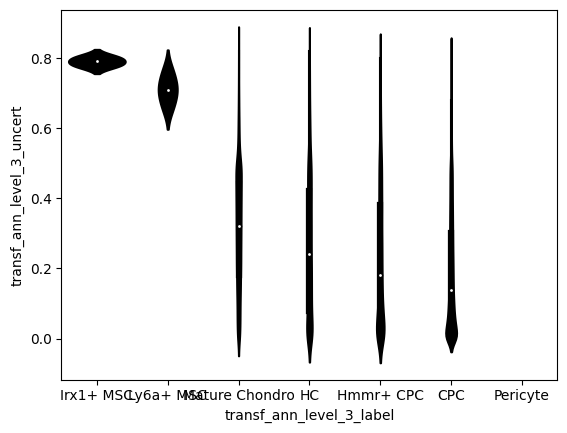

In [289]:
 sns.violinplot(
        data=ChondroDf,
        x="transf_ann_level_3_label",
        y="transf_ann_level_3_uncert",
        color="black",
        order=chondroDfOrder,
    )
plt.show()

In [284]:
ChondroDf.groupby("transf_ann_level_3_label").agg({
    "transf_ann_level_3_uncert":"mean"}).sort_values("transf_ann_level_3_uncert",ascending=False).index

CategoricalIndex(['Irx1+ MSC', 'Ly6a+ MSC', 'Col1a1.Chondro', 'Late.MSC', 'Ob',
                  'Pre-ob', 'Lepr+ BMSC', 'Low quality', 'Fibro', 'Middle.MSC',
                  'Early.MSC', 'Tex14+ HC', 'Cyp26a1.Chondro',
                  'Mature Chondro', 'HC', 'Hmmr+ CPC', 'CPC', 'Meninges',
                  'Pericyte'],
                 categories=['CPC', 'Col1a1.Chondro', 'Cyp26a1.Chondro', 'Early.MSC', ..., 'Ob', 'Pericyte', 'Pre-ob', 'Tex14+ HC'], ordered=False, dtype='category', name='transf_ann_level_3_label')

In [273]:
ChondroDf

,orig.ident,nCount_originalexp,nFeature_originalexp,Sample,Project,Limb.Atlas,Organ,Tissue,Tissue.Specific.,Stage,...,most_confident_level,most_confident_uncert,most_confident_label,transf_ann_level_5_uncert,transf_ann_level_4_uncert,transf_ann_level_3_uncert,transf_ann_level_2_uncert,transf_ann_level_1_uncert,Tissue.Specific,Core_or_Extand
AACAAAGCACGCTATA-1_1_2_1,Articular_Arce_CtrlI,0.0,0,Articular_Arce_CtrlI,Articular_Arce,False,Limb_adult,Synovial Joint,Knee Synovial Joint,Injury(Regeneration),...,C7_named,1.199914e-01,Chondro,0.579986,0.579986,0.359975,1.199914e-01,0.000000e+00,Knee Synovial Joint,Extand
AACAAAGCATATACCG-1_1_2_1,Articular_Arce_CtrlI,0.0,0,Articular_Arce_CtrlI,Articular_Arce,False,Limb_adult,Synovial Joint,Knee Synovial Joint,Injury(Regeneration),...,C7_named,3.599739e-01,Chondro,0.679912,0.639920,0.519941,3.599739e-01,0.000000e+00,Knee Synovial Joint,Extand
AAGACAACAGGGATAC-1_1_2_1,Articular_Arce_CtrlI,0.0,0,Articular_Arce_CtrlI,Articular_Arce,False,Limb_adult,Synovial Joint,Knee Synovial Joint,Injury(Regeneration),...,C7_named,3.599475e-01,Chondro,0.699882,0.699882,0.519902,3.599475e-01,1.999265e-02,Knee Synovial Joint,Extand
AATGGAATCGTTCTAT-1_1_2_1,Articular_Arce_CtrlI,0.0,0,Articular_Arce_CtrlI,Articular_Arce,False,Limb_adult,Synovial Joint,Knee Synovial Joint,Injury(Regeneration),...,C7_named,4.799734e-01,Chondro,0.719974,0.719974,0.559974,4.799734e-01,1.110223e-16,Knee Synovial Joint,Extand
ACATCCCGTCGGTGAA-1_1_2_1,Articular_Arce_CtrlI,0.0,0,Articular_Arce_CtrlI,Articular_Arce,False,Limb_adult,Synovial Joint,Knee Synovial Joint,Injury(Regeneration),...,C19_named,5.998575e-01,CPC,0.779860,0.680122,0.599858,5.998575e-01,0.000000e+00,Knee Synovial Joint,Extand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCATCAGTG_8,Septoclasts_Kishor_Fracture4,0.0,0,Septoclasts_Kishor_Fracture4,Septoclasts_Kishor,False,Limb_adult,Femur;Tibia,Bone marrow,Injury(Regeneration),...,C7_named,1.110223e-16,Chondro,0.560004,0.400010,0.299993,1.110223e-16,1.110223e-16,Bone marrow,Extand
TTTGTTGAGCGTTCCG_8,Septoclasts_Kishor_Fracture4,0.0,0,Septoclasts_Kishor_Fracture4,Septoclasts_Kishor,False,Limb_adult,Femur;Tibia,Bone marrow,Injury(Regeneration),...,C7_named,1.000009e-01,Chondro,0.540003,0.400006,0.360008,1.000009e-01,0.000000e+00,Bone marrow,Extand
TTTGTTGAGTGGAAAG_8,Septoclasts_Kishor_Fracture4,0.0,0,Septoclasts_Kishor_Fracture4,Septoclasts_Kishor,False,Limb_adult,Femur;Tibia,Bone marrow,Injury(Regeneration),...,C7_named,2.000030e-02,Chondro,0.580001,0.500002,0.360002,2.000030e-02,0.000000e+00,Bone marrow,Extand
TTTGTTGCAAATCCCA_8,Septoclasts_Kishor_Fracture4,0.0,0,Septoclasts_Kishor_Fracture4,Septoclasts_Kishor,False,Limb_adult,Femur;Tibia,Bone marrow,Injury(Regeneration),...,C7_named,0.000000e+00,Chondro,0.480002,0.480002,0.460011,0.000000e+00,0.000000e+00,Bone marrow,Extand


In [260]:
chondro_uncert_info["Organ"]

Sample
Articular_Arce_CtrlI             Limb_adult
Articular_Arce_CtrlU             Limb_adult
Articular_Arce_T1MDI             Limb_adult
Articular_Arce_T1MDU             Limb_adult
Articular_Sebastian_3DPI         Limb_adult
                                   ...     
SkeletalMuscle_Julien_d3         Limb_adult
SkeletalMuscle_Julien_d3Poly     Limb_adult
SkeletalMuscle_Julien_d5         Limb_adult
SkeletalMuscle_Julien_d5Poly     Limb_adult
Sp7Cre2019_Bohm                 Limb_embryo
Name: Organ, Length: 186, dtype: object

In [241]:
chondroOrder

CategoricalIndex(['Heterotopic ossification', 'Injury(Non-Regeneration)',
                  'in vitro', 'Injury(Regeneration)', 'Treated',
                  'Injury(Radiation)', 'Disease', 'Steady', 'Injury(5-FU)',
                  'Development'],
                 categories=['Development', 'Disease', 'Heterotopic ossification', 'Injury(5-FU)', ..., 'Injury(Regeneration)', 'Steady', 'Treated', 'in vitro'], ordered=False, dtype='category', name='Stage')

In [231]:
chondro_uncert_info["Stage"]

Sample
Articular_Arce_CtrlI            Injury(Regeneration)
Articular_Arce_CtrlU            Injury(Regeneration)
Articular_Arce_T1MDI            Injury(Regeneration)
Articular_Arce_T1MDU            Injury(Regeneration)
Articular_Sebastian_3DPI        Injury(Regeneration)
                                        ...         
SkeletalMuscle_Julien_d3        Injury(Regeneration)
SkeletalMuscle_Julien_d3Poly    Injury(Regeneration)
SkeletalMuscle_Julien_d5        Injury(Regeneration)
SkeletalMuscle_Julien_d5Poly    Injury(Regeneration)
Sp7Cre2019_Bohm                          Development
Name: Stage, Length: 186, dtype: category
Categories (10, object): ['Development', 'Disease', 'Heterotopic ossification', 'Injury(5-FU)', ..., 'Injury(Regeneration)', 'Steady', 'Treated', 'in vitro']

In [222]:
ChondroDf["Stage"].unique()

['Injury(Regeneration)', 'Steady', 'Disease', 'Treated', 'Injury(5-FU)', 'Development', 'Injury(Radiation)', 'Injury(Non-Regeneration)', 'Heterotopic ossification', 'in vitro']
Categories (10, object): ['Development', 'Disease', 'Heterotopic ossification', 'Injury(5-FU)', ..., 'Injury(Regeneration)', 'Steady', 'Treated', 'in vitro']

In [218]:
sample_age_uncert_info['Treatment']

,Age,transf_ann_level_3_uncert,Tissue,Treatment,Project,Stage,Organ
Sample,,,,,,,
Articular_Arce_CtrlI,Young Adult,0.380084,Synovial Joint,None,Articular_Arce,Injury(Regeneration),Limb_adult
Articular_Arce_CtrlU,Young Adult,0.188748,Synovial Joint,None,Articular_Arce,Injury(Regeneration),Limb_adult
Articular_Arce_T1MDI,Young Adult,0.263892,Synovial Joint,None,Articular_Arce,Injury(Regeneration),Limb_adult
Articular_Arce_T1MDU,Young Adult,0.125092,Synovial Joint,None,Articular_Arce,Injury(Regeneration),Limb_adult
Articular_Sebastian_3DPI,Young Adult,0.469861,Synovial Joint,tibial compressive overload model,Articular_Sebastian,Injury(Regeneration),Limb_adult
...,...,...,...,...,...,...,...
SkeletalMuscle_Julien_d3,Adult,0.427330,Muscle,None,SkeletalMuscle_Julien,Injury(Regeneration),Limb_adult
SkeletalMuscle_Julien_d3Poly,Adult,0.402621,Muscle,None,SkeletalMuscle_Julien,Injury(Regeneration),Limb_adult
SkeletalMuscle_Julien_d5,Adult,0.399081,Muscle,None,SkeletalMuscle_Julien,Injury(Regeneration),Limb_adult


In [537]:
reference.obs["transf_ann_level_4_label"]

Suture2021_Farmer_E17_AAACCTGCAGACTCGC-1_1-0       Alcam.Late.MSC
Suture2021_Farmer_E17_AAACCTGGTGCGGTAA-1_1-0     Col6a6.Ly6a+ MSC
Suture2021_Farmer_E17_AAACCTGGTGGTCTCG-1_1-0           Col22a1.Ob
Suture2021_Farmer_E17_AAACCTGTCACCACCT-1_1-0           Col22a1.Ob
Suture2021_Farmer_E17_AAACCTGTCGTTACGA-1_1-0    Col6a5.Lepr+ BMSC
                                                      ...        
TTTGACTGTATTTCCT-1_5-1-2                              Otos.Pre-ob
TTTGACTGTTGCATTG-1_5-1-2                          Pclaf.Early.MSC
TTTGACTTCTTGGGCG-1_5-1-2                                Pde11a.HC
TTTGGAGCAGCGACAA-1_5-1-2                                Bglap3.Ob
TTTGGTTCACTACTTT-1_5-1-2                               Col22a1.Ob
Name: transf_ann_level_4_label, Length: 273479, dtype: category
Categories (36, object): ['A2m+ Chondro', 'Adipoq.Lepr+ BMSC', 'Alcam.Late.MSC', 'Aldh1a3+ HC', ..., 'Sfrp4.Late.MSC', 'Slurp1.Fibro', 'Ucma.CPC', 'Wnt2.Late.MSC']

In [536]:
full_latent

AnnData object with n_obs × n_vars = 782507 × 15
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'Sample', 'Project', 'Limb.Atlas', 'Organ', 'Tissue', 'Tissue.Specific.', 'Stage', 'Gene.type', 'Treatment', 'Age', 'Age.In.Detail.', 'Machine', 'Species', 'Isolation.approach', 'Digestion', 'Enzymes', 'Cre', 'Bone.Forming.Methods', 'Data.Source', 'Related.Assay', 'Origin', 'nCount_RNA', 'nFeature_RNA', 'paper_label', 'coarse_label', 'C2_named', 'C7_named', 'C19_named', 'C36_named', 'C49_named', 'C90_named', 'C137_named', 'transf_ann_level_7_label', 'transf_ann_level_6_label', 'transf_ann_level_5_label', 'transf_ann_level_4_label', 'transf_ann_level_3_label', 'transf_ann_level_2_label', 'transf_ann_level_1_label', 'n_genes', 'most_confident_level', 'most_confident_uncert', 'most_confident_label', 'transf_ann_level_5_uncert', 'transf_ann_level_4_uncert', 'transf_ann_level_3_uncert', 'transf_ann_level_2_uncert', 'transf_ann_level_1_uncert', 'Tissue.Specific', 'Core_or_Ext

In [ ]:
for figname, fig in FIGURES.items():
    print("saving", figname)
    fig.savefig(
        os.path.join(dir_figures, f"{figname}.png"),
        bbox_inches="tight",
        dpi=140,
        transparent=True,
    )
    plt.close()